### School Shooter Investigation
##### Data Storytelling


Shootings and violence have plagued the US school system for decades, and don't appear to be slowing down in recent years despite a growing awareness of the problem.  According to a recent study from Pew Research, about 57 percent of US teens aged 13 to 17 say they are at least somewhat worried about the possiblity of a shooting happening at their school.  Over half of our students are worried about violence in a place that should ultimately be safe for them!  Many people (including politicians, educators, parents and students themselves) have an opinion on the best course of action reduce or prevent these incidents of violence.  However, many of them are based on feelings, beliefs, or small samples of evidence.  It is my proposal that an objective investigation based in data will help inform what actions may be the best to reduce these events.

In [4]:
#Import necessary packages and load dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('cleaned_data.csv', parse_dates=['date_time'])
sns.set(style='ticks')

<Figure size 432x288 with 0 Axes>

My first interest was how the incidents of school violence since 2010 were separated into types (accidental, indiscriminate, suicide, targeted, or unclear).  It turns out that the overwhelming majority of school violence is perpetrated by shooters targeting a specific individual, following by indiscriminate shootings as a distant second.  As can be seen in the graph below, there are there twice as many incidents of targeted school shootings than any other type.

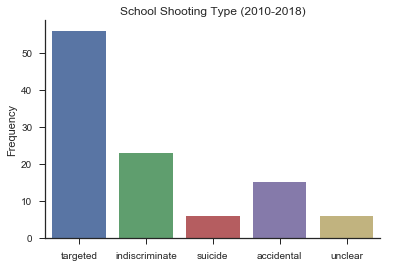

In [6]:
sns.countplot(data=df,
              x='shooting_type')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('School Shooting Type (2010-2018)')
sns.despine()
plt.show()

At first glance, it would make the most sense to thoroughly analyze the targeted school shootings, but upon further investigation, I realized this is not the situation. While targeted shooting incidents were the most common, they are clearly not the most devastating.  Indiscriminate shooting types had the most devastating impact with 4 of the incidents having more than 15 casualties.  In fact, the indiscriminate shootings had 129 casualties altogether while the other categories together had only 99!

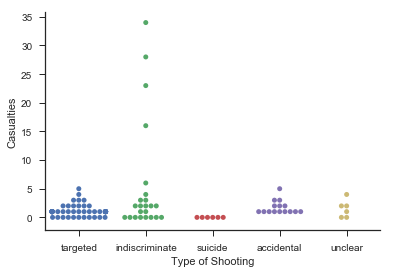

In [7]:
sns.swarmplot(data=df,
            x='shooting_type',
            y='casualties')
plt.xlabel('Type of Shooting')
plt.ylabel('Casualties')
sns.despine()
plt.savefig('casualty breakdown')
plt.show()


We can also see in the plot below that students (whether they be current or former) of that particular school are the most likely to commit an act of violence toward students.  They are also responsible for the majority of the casualties.

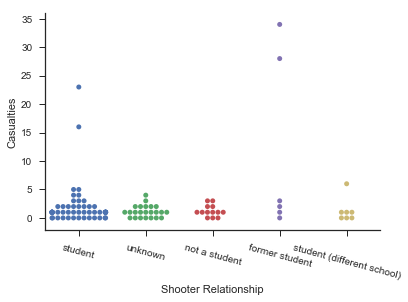

In [12]:
sns.swarmplot(data=df,
             x='shooter_relationship1',
             y='casualties')
plt.xticks(rotation=-15)
plt.xlabel('Shooter Relationship')
plt.ylabel('Casualties')
sns.despine()
plt.savefig('shooter relationship to casualties', bbox_inches='tight')
plt.show()

While any incident of school shooting is important and should be investigated thoroughly, it appears that the most common and devastating of these are perpetrated by students targeting an individual or individuals, or indiscriminately attacking individuals.  If we look into these incidents more closely, what might we find?

For the most part, the distribution of the incidents of shooting is not surprising.  There is a substantial dip during the summer months (5, 6, 7) while school is traditionally not in session.  It also appears that indiscriminate shootings are fairly evenly distributed throughout the remaining months.  However, it is surprising that almost 18% of these incidents were targeted shootings in January!  Clearly there is something important about this month or the months leading up to it for students who target an individual or individuals.

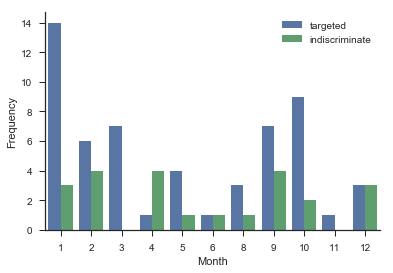

In [16]:
targ_ind = df.loc[df.shooting_type.str.contains('targeted|indiscriminate'),:]

sns.countplot(targ_ind.date_time.dt.month,
              hue=targ_ind.shooting_type)
plt.xlabel('Month')
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper right')
plt.savefig('month breakdown')
plt.show()

Again, we see that the indiscriminate shootings seem roughly evenly distributed throughout the days of the week, suggesting they are independent of each other.  However, targeted shootings seem much more likely to occur on a Tuesday or a Friday.  

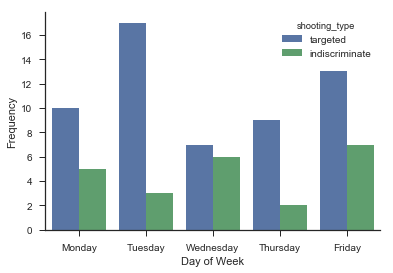

In [18]:
sns.countplot(targ_ind.day_of_week,
              hue=targ_ind.shooting_type,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
sns.despine()
plt.savefig('day of the week breakdown')
plt.show()

So what leads a student to commit an act of violence against their school, whether it is targeted or indiscriminate? What steps can we take to identify these potential issues and resolve them before a tragedy occurs?  From my initial observations, it appears that indiscriminate shootings are occurring independently of the time of year or day of the week.  This could make it difficult to predict this situation with any reliability.

However, targeted shootings seem to be more focused on certain times of the year as well as certain days of the week.  Perhaps it is possible to identify with some confidence any variables that could help us to predict these situations occuring.